

# <div style="text-align: right"> Redfin Capstone Visuals</div>

<div style="text-align: right"> Modified Oct 23, 2017</div>
<div style="text-align: right"> Geoff Counihan </div>

In [7]:
from importlib import reload
from utils_2 import *
import utils_2; reload(utils_2)
import pickle
%matplotlib inline

In [10]:
def subset(df,term):
    import re
    return df[[col for col in df.columns if re.findall(term,col)]]

In [11]:
def plot(df,term='Median Sale Price',fig=(15,4)):
    import re
    df[[col for col in df.columns if re.findall(term+'$',col)]].plot(figsize=fig)

#### Load data for the top 50 metros in the US

In [30]:
df = pd.read_csv('./data/clean_top50.csv')
df['Period End'] = pd.to_datetime(df['Period End'])
df = df.set_index('Period End')
df = impute_knn(df,5)

Imputing row 1/101 with 5413 missing, elapsed time: 0.306
Imputing row 101/101 with 254 missing, elapsed time: 1.275
[KNN] Warning: 55681/689325 still missing after imputation, replacing with 0


#### Set timeperiods for splits to take place

The data will be split into thirds. 

In [13]:
end_first_3_years = '2011-08-31'
start_middle_3_years = '2011-09-30'
end_middle_3_years = '2014-04-30'
start_last_3_years = '2014-05-31'
start_last_6_years = '2011-09-30'

time_list = [end_first_3_years,
             start_middle_3_years,
             end_middle_3_years,
             start_last_3_years,
             start_last_6_years]

#### Select cities to use in training and holdout sets

Of the 50 cities that were downloaded from Redfin the 28 cities below were choosen at random except for the choice to put San Diego and San Francisco in separate groups (due to their atypcal trends). 21 cities and the national average were dropped from the top 50 set because they had too many missing values to impute properly.

In [14]:
city_list = ['Austin, TX metro area',
 'Boston, MA metro area',
 'Buffalo, NY metro area',
 'Chicago, IL metro area',
 'Cleveland, OH metro area',
 'Dallas-Fort Worth, TX metro area',
 'Houston, TX metro area',
 'Kansas City, MO metro area',
 'Las Vegas, NV metro area',
 'Los Angeles, CA metro area',
 'Miami, FL metro area',
 'Oakland, CA metro area',
 'Philadelphia, PA metro area',
 'Phoenix, AZ metro area',
 'Pittsburgh, PA metro area',
 'Portland, OR metro area',
 'Providence, RI metro area',
 'San Francisco, CA metro area']

city_holdout_list = [
 'Salt Lake City, UT metro area',
 'San Antonio, TX metro area',
 'San Diego, CA metro area',
 'San Jose, CA metro area',
 'Seattle, WA metro area',
 'Tampa, FL metro area',
 'Washington, DC metro area',
 'Indianapolis, IN metro area',
 'Orlando, FL metro area']

#### Boston data

Features of the dataset and different trends they exhibit

In [19]:
bos = subset(df,'Boston, MA metro area')
bos = subset(bos,'All Residential')

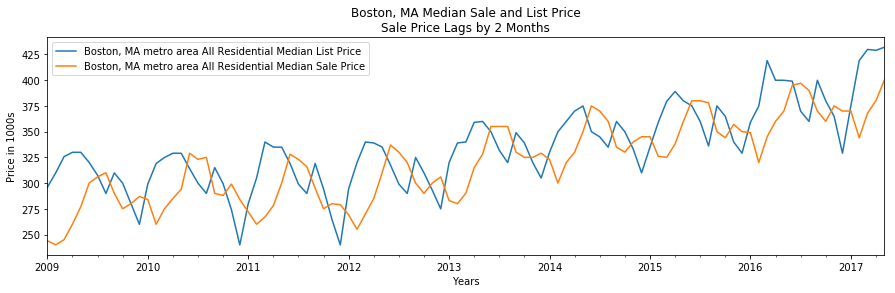

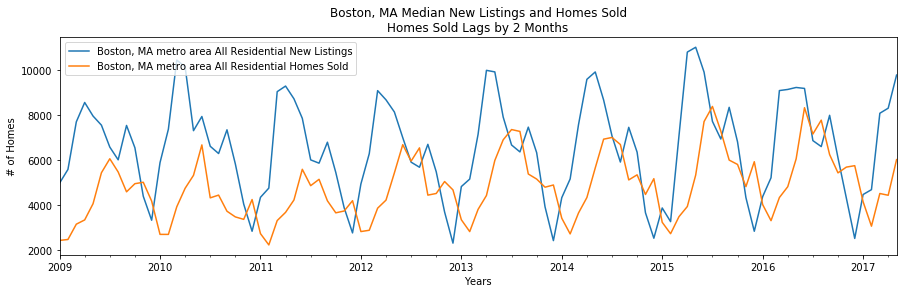

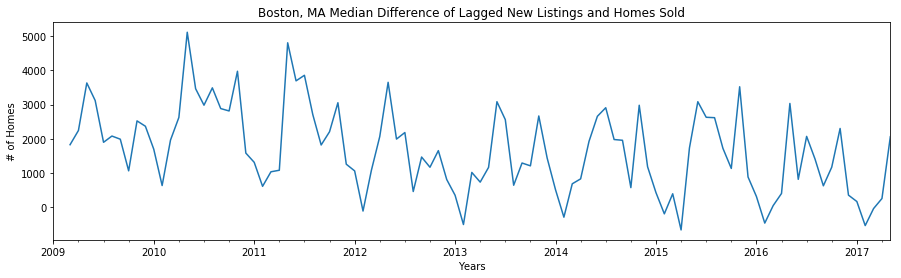

In [21]:
# bos['Boston, MA metro area All Residential Inventory'].plot(figsize=(15,4))
# plt.ylabel('Months')
# plt.xlabel('Years')
# plt.figure()
# bos['Boston, MA metro area All Residential Median Dom'].plot(title='',figsize=(15,4))
# plt.ylabel('Months')
# plt.xlabel('Years')
# plt.figure()
bos['Boston, MA metro area All Residential Median List Price'].plot(
    title='Boston, MA Median Sale and List Price\nSale Price Lags by 2 Months'
    ,figsize=(15,4))
bos['Boston, MA metro area All Residential Median Sale Price'].plot(title='',figsize=(15,4))
plt.legend()
plt.ylabel('Price in 1000s')
plt.xlabel('Years')
plt.figure()
# bos['Boston, MA metro area All Residential Sold Above List'].plot(title='',figsize=(15,4))
# plt.figure()
# bos['Boston, MA metro area All Residential Median Dom'].plot(title='Boston, MA metro area\nAverage Sale to List',figsize=(15,4))
# plt.legend()
# plt.ylabel('Percent')
# plt.xlabel('Years')
# plt.figure()
# (bos['Boston, MA metro area All Residential Median Sale Price']*1000/bos['Boston, MA metro area All Residential Median Ppsf']).plot(title='',figsize=(15,4))
# plt.legend()
# plt.ylabel('Median Sqft')
# plt.xlabel('Years')
# plt.figure()
bos['Boston, MA metro area All Residential New Listings'].plot(
    title='Boston, MA Median New Listings and Homes Sold\nHomes Sold Lags by 2 Months'
    ,figsize=(15,4))
# bos['Boston, MA metro area All Residential New Listings'].shift(2).plot(
#     title='Boston, MA Median New Listings and Homes Sold\nHomes Sold Lags by 2 Months'
#     ,figsize=(15,4))
bos['Boston, MA metro area All Residential Homes Sold'].plot(title='',figsize=(15,4))
plt.legend()
plt.ylabel('# of Homes')
plt.xlabel('Years')
plt.figure()
(bos['Boston, MA metro area All Residential New Listings'].shift(2)-bos['Boston, MA metro area All Residential Homes Sold']).plot(
    title='Boston, MA Median Difference of Lagged New Listings and Homes Sold'
    ,figsize=(15,4))
#bos['Boston, MA metro area All Residential Homes Sold'].plot(title='',figsize=(15,4))
plt.ylabel('# of Homes')
plt.xlabel('Years')
plt.figure()


#### Visual for train/test split

I created a complex train/test split for this problem, which is broken down into two sets of cities: train cities and holdout cities. Within each set, I split each city's historic data into 3 parts. 

For the training cities, the 1st tier models were trained on the first third, the 2nd tier regression model was trained on the residual of the middle third and the 1st + 2nd tier combination was evaluated on the last third.

For the test cities, the pre-trained regression models were used to predict the residual of the last third. Then this prediction was added to the 1st tier model to produce the result which was then evaluated.

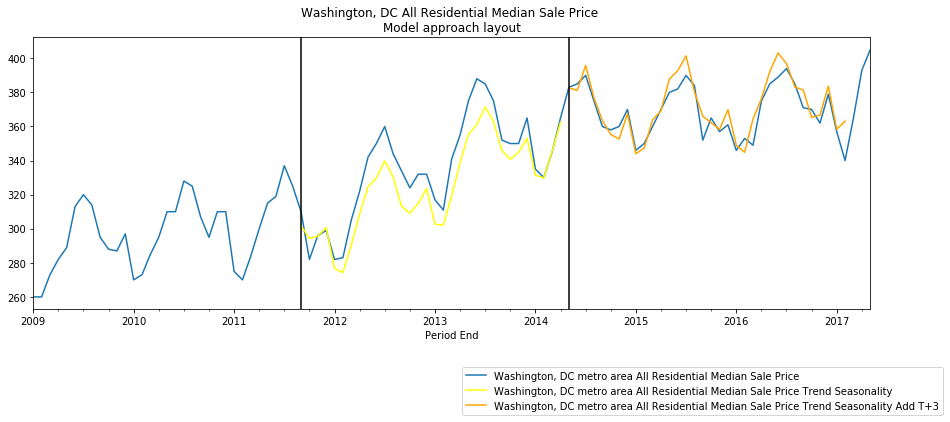

In [25]:
hold_city_add_dict_t1 = pickle.load(open("./dicts/hold_city_add_dict6_t1.p", "rb"))
hold_city_add_dict_t2 = pickle.load(open("./dicts/hold_city_add_dict6_t2.p", "rb"))
hold_city_add_dict_t3 = pickle.load(open("./dicts/hold_city_add_dict6_t3.p", "rb"))

dc_msp = df['Washington, DC metro area All Residential Median Sale Price']

#dc_msp = hold_city_add_dict_t1['Washington, DC metro area']['Washington, DC metro area All Residential Median Sale Price']
dc_ts = hold_city_add_dict_t3['Washington, DC metro area']['Washington, DC metro area All Residential Median Sale Price Trend Seasonality']
dc_tsa = hold_city_add_dict_t3['Washington, DC metro area']['Washington, DC metro area All Residential Median Sale Price Trend Seasonality Add T+3']

f = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((100,100), (0, 0), colspan=300, rowspan=150)
#plot(df_orig,'Median Sale Price')
dc_msp.plot()
dc_ts[start_middle_3_years:end_middle_3_years].plot(color='yellow')
dc_tsa[start_last_3_years:].plot(color='orange')
#col_decomp.trend.plot()
plt.title('Washington, DC All Residential Median Sale Price \nModel approach layout',loc='center', color='black')
#d.plot(kind='bar', ax=f.gca())
plt.legend(loc='center', bbox_to_anchor=(.8, -.3))#1.1
#plt.legend(bbox_to_anchor=(0.65,1))
xposition = [pd.to_datetime('2011-09-30'), pd.to_datetime('2014-05-31')]
for xc in xposition:
    ax1.axvline(x=xc, color='k', linestyle='-')
plt.show()

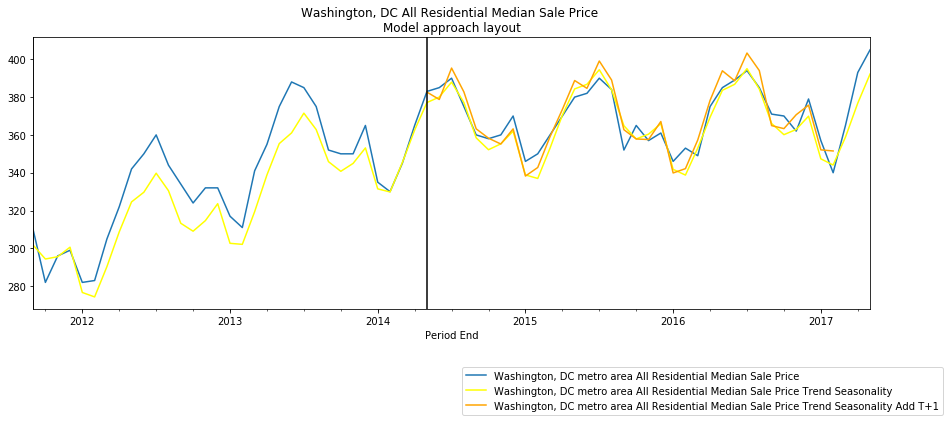

In [29]:
dc_msp = hold_city_add_dict_t1['Washington, DC metro area']['Washington, DC metro area All Residential Median Sale Price'].dropna()
dc_ts = hold_city_add_dict_t1['Washington, DC metro area']['Washington, DC metro area All Residential Median Sale Price Trend Seasonality']
dc_tsa = hold_city_add_dict_t1['Washington, DC metro area']['Washington, DC metro area All Residential Median Sale Price Trend Seasonality Add T+1']

f = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((100,100), (0, 0), colspan=300, rowspan=150)
#plot(df_orig,'Median Sale Price')
dc_msp.plot()
#dc_ts[start_middle_3_years:end_middle_3_years].plot(color='yellow')
dc_ts[start_middle_3_years:].plot(color='yellow')
dc_tsa[start_last_3_years:].plot(color='orange')
#col_decomp.trend.plot()
plt.title('Washington, DC All Residential Median Sale Price \nModel approach layout',loc='center', color='black')
#d.plot(kind='bar', ax=f.gca())
plt.legend(loc='center', bbox_to_anchor=(.8, -.3))#1.1
#plt.legend(bbox_to_anchor=(0.65,1))
xposition = [pd.to_datetime('2011-09-30'), pd.to_datetime('2014-05-31')]
for xc in xposition:
    ax1.axvline(x=xc, color='k', linestyle='-')
plt.show()

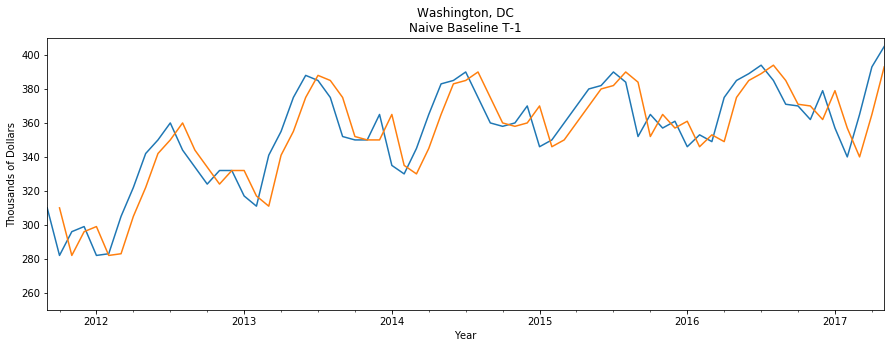

In [32]:
col_decomp = sm.tsa.seasonal_decompose(dc_msp,two_sided=False)
dc_msp.plot(figsize=(15,5),title='Washington, DC\nMedian Sale Price')
t = 1
dc_msp.shift(t).plot(figsize=(15,5),title='Washington, DC\nNaive Baseline T-{}'.format(t))
plt.ylim((250,410))
plt.ylabel('Thousands of Dollars')
plt.xlabel('Year')
plt.figure()

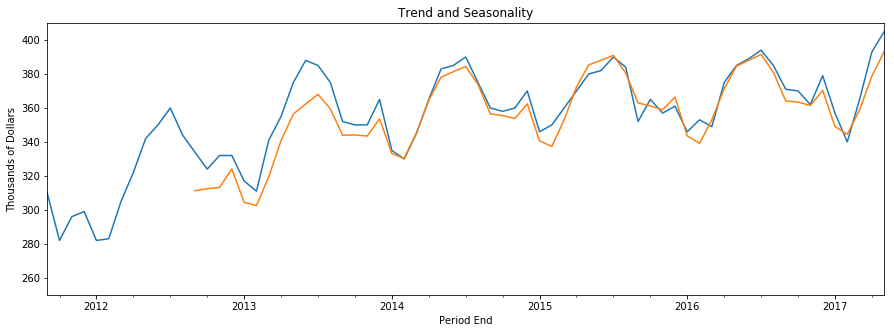

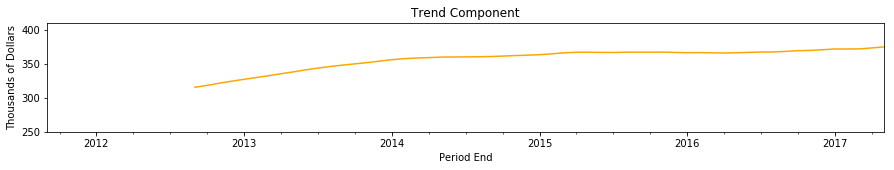

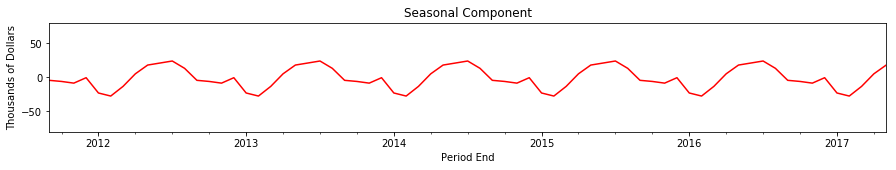

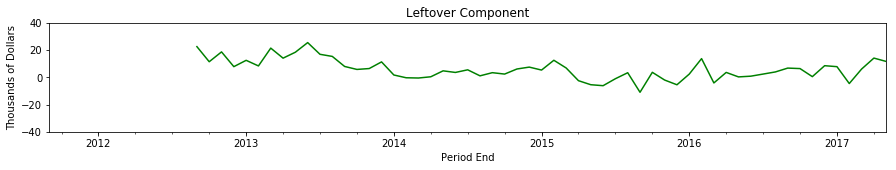

In [28]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

col_decomp = sm.tsa.seasonal_decompose(dc_msp,two_sided=False)
# dc_msp.plot(figsize=(15,5),title='Washington, DC\nMedian Sale Price')
# dc_msp.shift(3).plot(figsize=(15,5),title='Washington, DC\nNaive Baseline')
# plt.ylim((250,410))
# plt.ylabel('Thousands of Dollars')
# plt.xlabel('Year')
# plt.figure()
dc_msp.plot(figsize=(15,5),title='Washington, DC Median Sale Price')
# plt.ylim((250,410))
# plt.ylabel('Thousands of Dollars')
# plt.xlabel('Year')
# plt.figure()
(col_decomp.trend+col_decomp.seasonal).plot(figsize=(15,5),title='Trend and Seasonality')
plt.ylim((250,410))
plt.ylabel('Thousands of Dollars')
plt.figure()
(col_decomp.trend).plot(color='orange',figsize=(15,2),title='Trend Component')
plt.ylim((250,410))
plt.ylabel('Thousands of Dollars')
plt.figure()
col_decomp.seasonal.plot(color='red',figsize=(15,2),title='Seasonal Component')
plt.ylabel('Thousands of Dollars')
plt.ylim((-80,80))
plt.figure()
col_decomp.resid.plot(color='green',figsize=(15,2),title='Leftover Component')
plt.ylabel('Thousands of Dollars')
plt.ylim((-40,40))
plt.figure()
# col_decomp.resid[start_last_3_years:].plot(figsize=(5,5),title='Leftover')
# plt.ylabel('Thousands of Dollars')
# plt.ylim((-40,40))
# plt.figure()
# (col_decomp.trend+col_decomp.seasonal)[start_last_3_years:].plot(figsize=(5,5),title='Trend Seasonal')
# plt.ylabel('Thousands of Dollars')
# plt.ylim((250,410))

# look at each coef of trained model

In [33]:
trained_models_dict = pickle.load(open("./dicts/trained_models_dict6.p", "rb"))

# set number of coefs to look at
num = 7

coefs_t1 = trained_models_dict['Median Sale Price Trend Seasonality Pred Error T+1']['coefs'].sort_values(ascending=False,by='coef').head(num)
coefs_t2 = trained_models_dict['Median Sale Price Trend Seasonality Pred Error T+2']['coefs'].sort_values(ascending=False,by='coef').head(num)
coefs_t3 = trained_models_dict['Median Sale Price Trend Seasonality Pred Error T+3']['coefs'].sort_values(ascending=False,by='coef').head(num)

coefs_t1 = coefs_t1.rename(columns = {'col':'Feature','coef':'T+1 coef'})
coefs_t2 = coefs_t2.rename(columns = {'col':'Feature','coef':'T+2 coef'})
coefs_t3 = coefs_t3.rename(columns = {'col':'Feature','coef':'T+3 coef'})

coefs_all = pd.concat([coefs_t1,coefs_t2,coefs_t3],axis=1)

coefs_all.fillna('')

,Feature,T+1 coef,Feature,T+2 coef,Feature,T+3 coef
168,Median List Ppsf T-0,0.169981,Median List Ppsf T-0,0.305249,Median List Ppsf T-0,0.266117
169,Median List Ppsf T-1,0.106041,,,,
210,Median List Price T-0,0.123348,Median List Price T-0,0.200818,Median List Price T-0,0.245818
211,Median List Price T-1,0.0961836,,,,
238,Median Ppsf T-0,0.115291,,,,
243,,,,,Median Ppsf T-5,0.100696
282,,,,,Median Sale Price T-2,0.133689
283,,,Median Sale Price T-3,0.175015,,
284,Median Sale Price T-4,0.170147,,,,
287,,,,,Median Sale Price T-7,0.0813467


# evaluate for each t

In [102]:
%%javascript 
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [476]:
def rmse(col):
    return np.sqrt(col**2).mean()

def absoluteval(col):
    return np.abs(col).sum()

In [472]:
import pickle
hold_model_error_dict_t1 = pickle.load(open("./dicts/hold_model_error_dict6_t1.p", "rb"))
hold_model_error_dict_t2 = pickle.load(open("./dicts/hold_model_error_dict6_t2.p", "rb"))
hold_model_error_dict_t3 = pickle.load(open("./dicts/hold_model_error_dict6_t3.p", "rb"))

hold_model_error_dict_ts = {}
hold_model_error_dict_ts['T+1'] = hold_model_error_dict_t1
hold_model_error_dict_ts['T+2'] = hold_model_error_dict_t2
hold_model_error_dict_ts['T+3'] = hold_model_error_dict_t3

#(hold_model_error_dict_ts[t]['Trend Seasonality Add Error'][start_last_3_years:].apply(rmse))#.mean()

model_performance = {}
model_performance['T+1'] = {}
model_performance['T+2'] = {}
model_performance['T+3'] = {}
model_performance_rmse = {}
model_performance_rmse['T+1'] = {}
model_performance_rmse['T+2'] = {}
model_performance_rmse['T+3'] = {}
model_performance_abs = {}
model_performance_abs['T+1'] = {}
model_performance_abs['T+2'] = {}
model_performance_abs['T+3'] = {}

models = []
for model in list(hold_model_error_dict_t1.keys()):
    print(model)
    models.append(model)
    for t in list(hold_model_error_dict_ts.keys()):
        #print(t+': '+str(hold_model_error_dict_ts[t][model].apply(rmse).mean()))
        #print('{}: {}'.format(t,hold_model_error_dict_ts[t][model][start_last_3_years:].apply(rmse).mean()))
        model_performance[t][model] = hold_model_error_dict_ts[t][model][start_last_3_years:]
        #model_performance_abs[t][model].append(hold_model_error_dict_ts[t][model][start_last_3_years:].apply(rmse))
        model_performance_rmse[t][model] = hold_model_error_dict_ts[t][model][start_last_3_years:].apply(rmse).mean()
        model_performance_abs[t][model] = hold_model_error_dict_ts[t][model][start_last_3_years:].apply(absoluteval).mean()

mp = pd.DataFrame(model_performance_rmse)
mp = mp.T
#mp.columns = list(hold_model_error_dict_t1.keys())
mp = mp[['Trend Seasonality Add Error', 
         'Trend Seasonality Error',
         'Best SARIMA Error', 
         #'Best SARIMA Add Error', 
         'Best ARIMA Error', 
         #'Best ARIMA Add Error', 
         #'Trend Add Error', 
         #'Trend Error',
         'Naive Baseline', 
       ]]

In [485]:
mp.sort_values(by='T+1',axis=1)

,Trend Seasonality Add Error,Best SARIMA Error,Best ARIMA Error,Naive Baseline,Trend Seasonality Error
T+1,4.987102,6.331809,7.363772,8.714715,12.259134
T+2,5.371972,8.433098,8.288797,12.621622,12.259134
T+3,5.661282,11.844310,10.968444,15.855856,12.259134


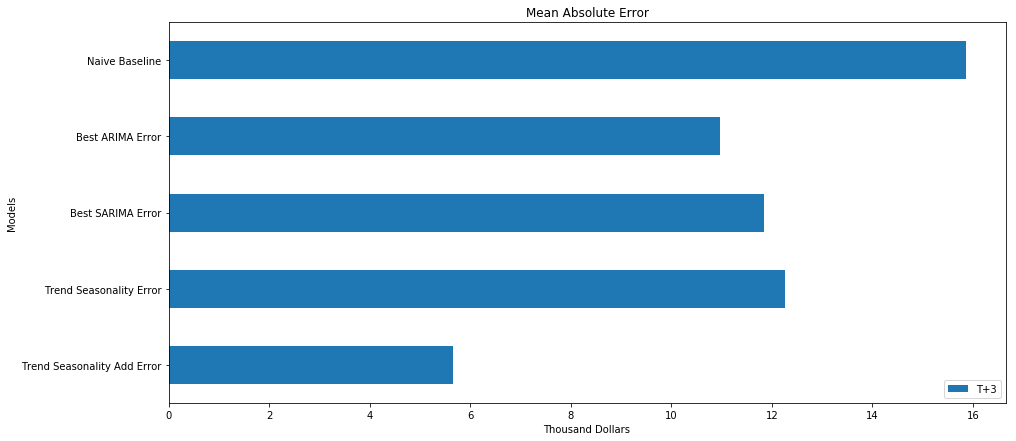

In [484]:
mp.drop(['T+2','T+1'],axis=0).T.plot(kind='barh',figsize=(15,7),title='Mean Absolute Error')
plt.xlabel('Thousand Dollars')
plt.ylabel('Models')


Forecasting 1 month out, the naive baseline prediction is off on average by ~8.71k
The 2nd best model's redictions are off on average ~6.33k
While the new Trend Seasonality Add model predictions are off by only 4.98k.

Imagine that small business transitioning from using a naive baseline to more accurate Trend Seasonality Add model when informing their decisions in a real estate flipping business. By using the new model they can be 3.7k more accurate entering and exiting from the market allowing them to potentially save 7k per transaction.

If they do 8-10 flips a year, which is an average volume for a small business, they could produce 56-70k of savings per year. Expanding to a 3 month out prediction, the company could save a whooping 140-200k in one year. 

#### Performance

- 47-68% better than naive baseline
- 57% better than trend baseline
- 27-56% better than best SARIMA
- 37-52% better than best ARIMA

#### Average error by model, colored by city, per month prediction

These aren't the most informative visuals, but there is a theme that is noticable. The 'Trend + Seasonality Add' displays the tightest histogram at each forecast. This is quite clear at 'T+3' where the average error is much less than other models.

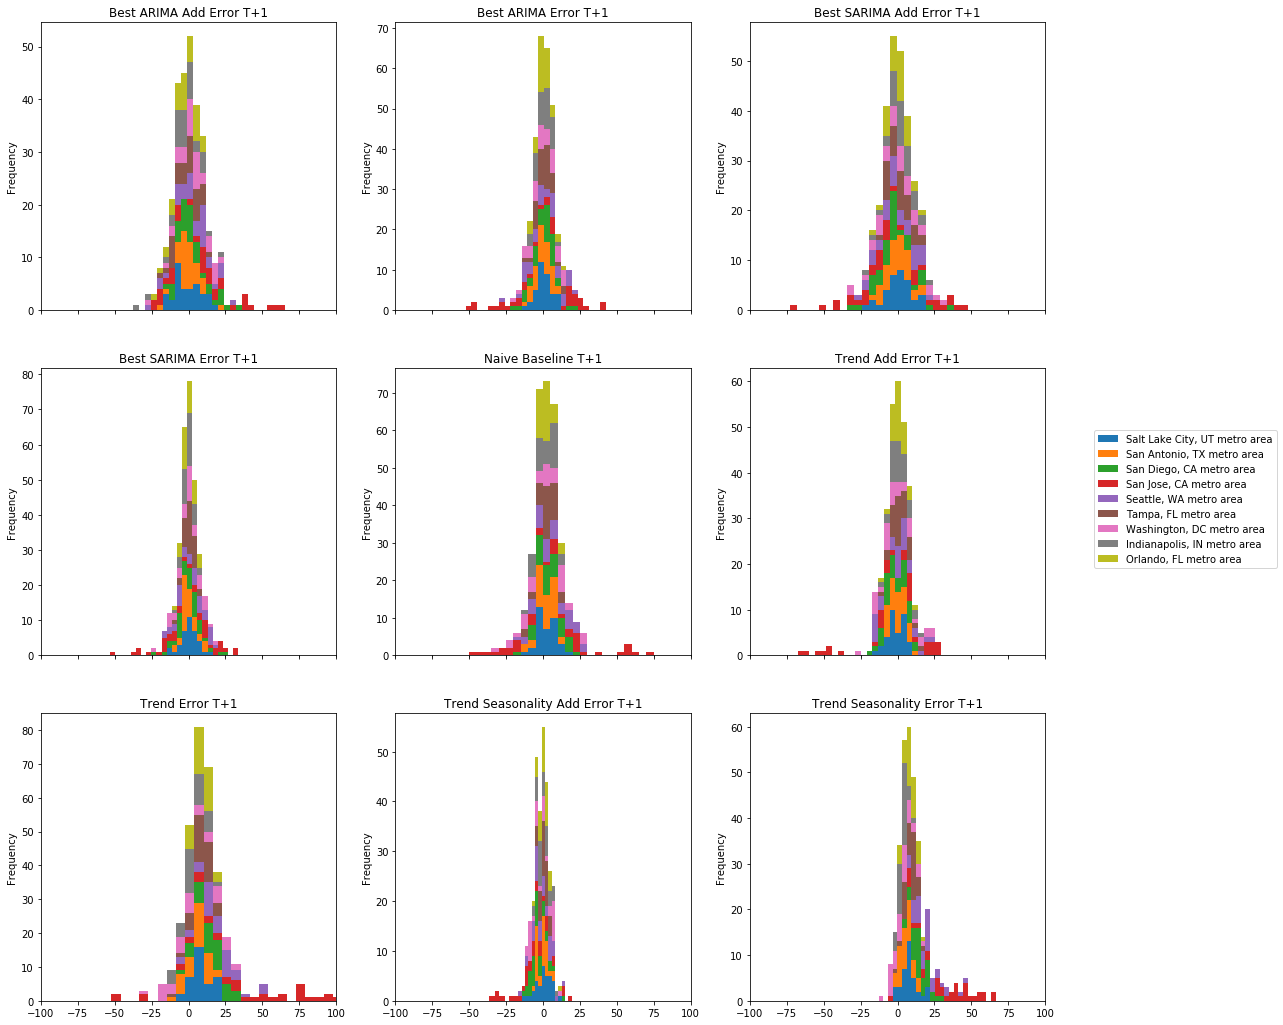

In [487]:
import re
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3)

t = 'T+1'
for ax,model in zip(axes.reshape(-1),sorted(hold_model_error_dict_t1.keys())):
    if model == 'Best ARIMA Add Error':
        ax.set_xlim((-100,100))
        #ax.legend([city_holdout_list])
        model_performance[t][model].plot(legend=False,
                                        #legend=[city_holdout_list],
                                         sharex=True,stacked=True,bins=25,
                                         kind='hist',ax=ax,figsize=(18,18),title='{} {}'.format(model,t))#.legend(bbox_to_anchor=(2.6, 1.6))
    else:
        ax.set_xlim((-100,100))
        model_performance[t][model].plot(legend=False,
                                         sharex=True,stacked=True,bins=25,
                                         kind='hist',ax=ax,figsize=(18,18),title='{} {}'.format(model,t))
plt.legend(city_holdout_list,bbox_to_anchor=(1.8, 2))
#plt.legend(bbox_to_anchor=(2.6, 1.6))

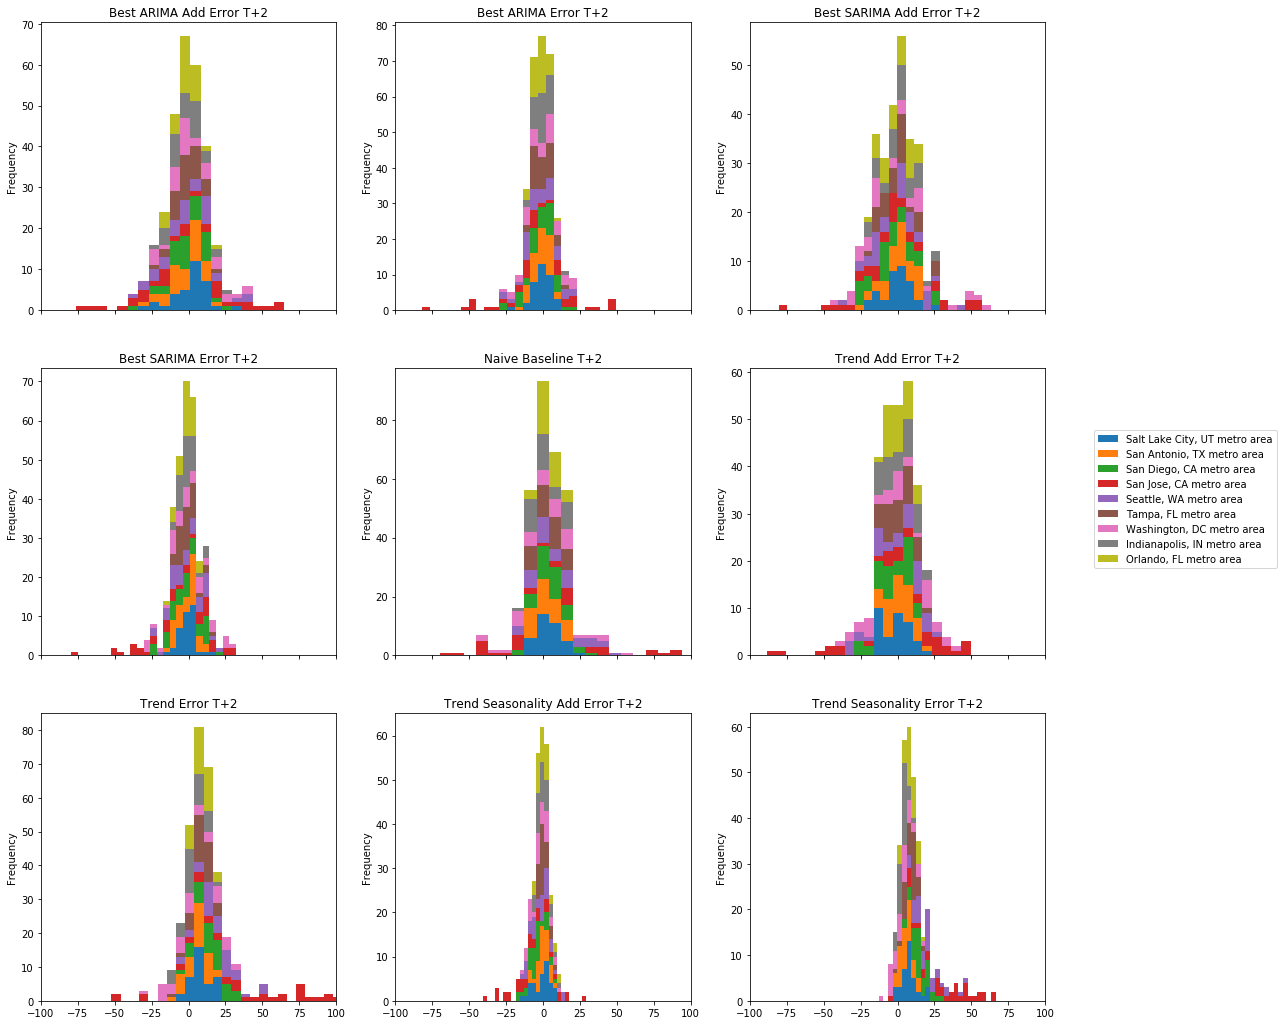

In [488]:
import re
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3)

t = 'T+2'
for ax,model in zip(axes.reshape(-1),sorted(hold_model_error_dict_t1.keys())):
    if model == 'Best ARIMA Add Error':
        ax.set_xlim((-100,100))
        #ax.legend([city_holdout_list])
        model_performance[t][model].plot(legend=False,
                                        #legend=[city_holdout_list],
                                         sharex=True,stacked=True,bins=25,
                                         kind='hist',ax=ax,figsize=(18,18),title='{} {}'.format(model,t))#.legend(bbox_to_anchor=(2.6, 1.6))
    else:
        ax.set_xlim((-100,100))
        model_performance[t][model].plot(legend=False,
                                         sharex=True,stacked=True,bins=25,
                                         kind='hist',ax=ax,figsize=(18,18),title='{} {}'.format(model,t))
plt.legend(city_holdout_list,bbox_to_anchor=(1.8, 2))
#plt.legend(bbox_to_anchor=(2.6, 1.6))

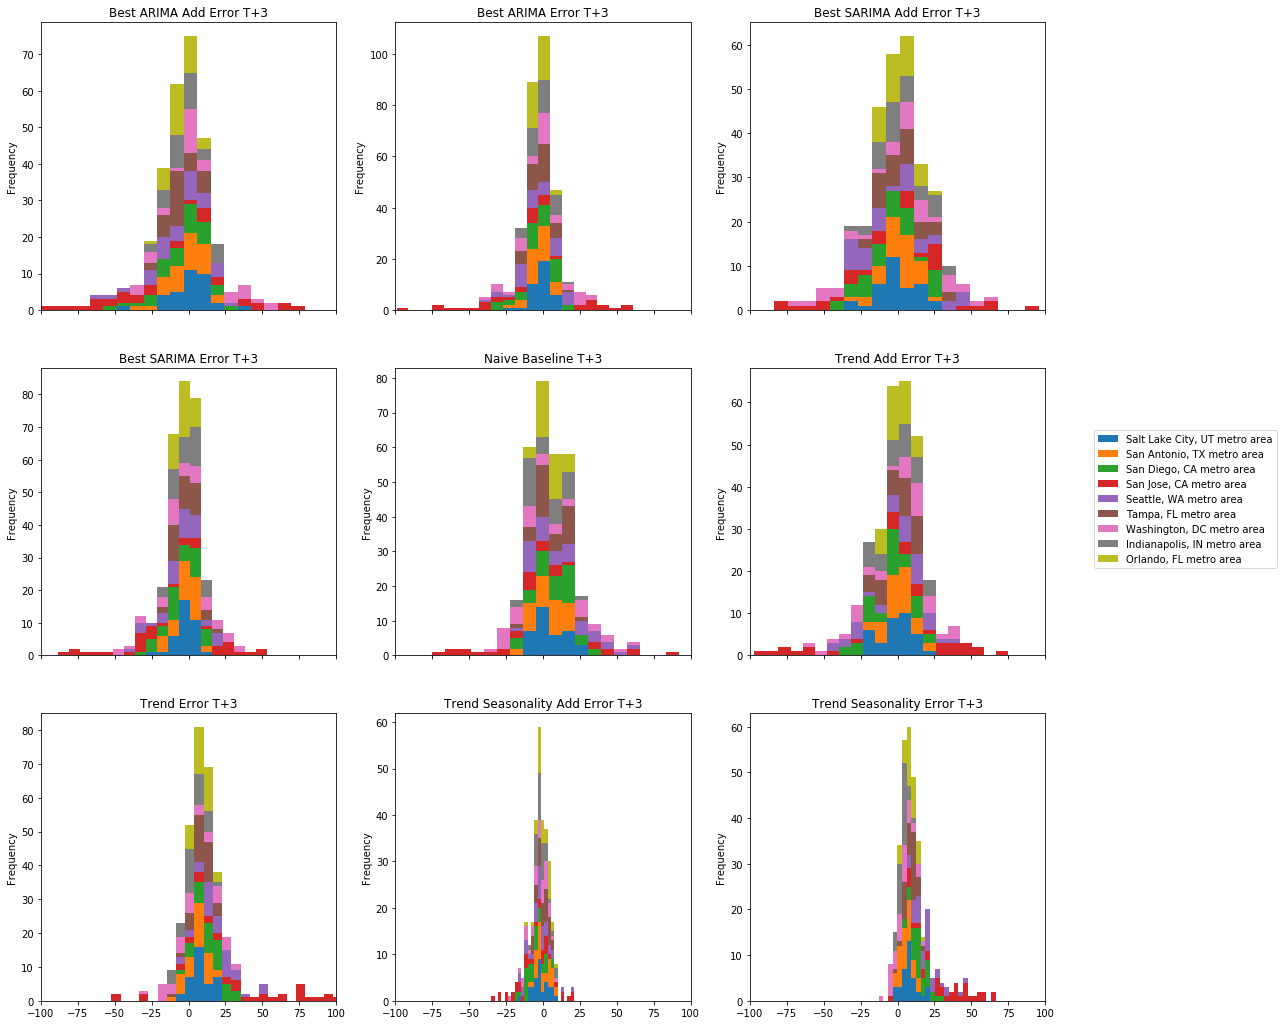

In [489]:
import re
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3)

t = 'T+3'
for ax,model in zip(axes.reshape(-1),sorted(hold_model_error_dict_t1.keys())):
    if model == 'Best ARIMA Add Error':
        ax.set_xlim((-100,100))
        #ax.legend([city_holdout_list])
        model_performance[t][model].plot(legend=False,
                                        #legend=[city_holdout_list],
                                         sharex=True,stacked=True,bins=25,
                                         kind='hist',ax=ax,figsize=(18,18),title='{} {}'.format(model,t))#.legend(bbox_to_anchor=(2.6, 1.6))
    else:
        ax.set_xlim((-100,100))
        model_performance[t][model].plot(legend=False,
                                         sharex=True,stacked=True,bins=25,
                                         kind='hist',ax=ax,figsize=(18,18),title='{} {}'.format(model,t))
plt.legend(city_holdout_list,bbox_to_anchor=(1.8, 2))
#plt.legend(bbox_to_anchor=(2.6, 1.6))

import re
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3)

t = 'T+3'
for ax,model in zip(axes.reshape(-1),sorted(hold_model_error_dict_t1.keys())):
    if model == 'Best ARIMA Add Error':
        ax.set_xlim((-100,100))
        #ax.legend([city_holdout_list])
        model_performance[t][model].plot(legend=False,
                                        #legend=[city_holdout_list],
                                         sharex=True,stacked=True,bins=25,
                                         kind='hist',ax=ax,figsize=(18,18),title=model+' '+t)#.legend(bbox_to_anchor=(2.6, 1.6))
    else:
        ax.set_xlim((-100,100))
        model_performance[t][model].plot(legend=False,
                                         sharex=True,stacked=True,bins=25,
                                         kind='hist',ax=ax,figsize=(18,18),title=model+' '+t)
plt.legend(city_holdout_list,bbox_to_anchor=(1.8, 2))
#plt.legend(bbox_to_anchor=(2.6, 1.6))

# distribution of error

In [490]:
model_error_distribution = {}
model_error_distribution['T+1'] = []
model_error_distribution['T+2'] = []
model_error_distribution['T+3'] = []
models = []
for model in list(hold_model_error_dict_t1.keys()):
    print(model)
    models.append(model)
    for t in list(hold_model_error_dict_ts.keys()):
        #print('{}: {}'.format(t,hold_model_error_dict_ts[t][model][start_last_3_years:])
        model_error_distribution[t].append(hold_model_error_dict_ts[t][model][start_last_3_years:])

Best ARIMA Error
Best ARIMA Add Error
Best SARIMA Error
Best SARIMA Add Error
Trend Error
Trend Add Error
Trend Seasonality Error
Trend Seasonality Add Error
Naive Baseline


# look at model error for 1 city

In [491]:
city_holdout_list

['Salt Lake City, UT metro area',
 'San Antonio, TX metro area',
 'San Diego, CA metro area',
 'San Jose, CA metro area',
 'Seattle, WA metro area',
 'Tampa, FL metro area',
 'Washington, DC metro area',
 'Indianapolis, IN metro area',
 'Orlando, FL metro area']

# each city predictions

In [182]:
hold_city_add_dict_t1 = pickle.load(open("hold_city_add_dict_t1.p", "rb"))
hold_city_add_dict_t2 = pickle.load(open("hold_city_add_dict_t2.p", "rb"))
hold_city_add_dict_t3 = pickle.load(open("hold_city_add_dict_t3.p", "rb"))

In [183]:
hold_city_add_dict_ts = {}
hold_city_add_dict_ts['T+1'] = hold_city_add_dict_t1
hold_city_add_dict_ts['T+2'] = hold_city_add_dict_t2
hold_city_add_dict_ts['T+3'] = hold_city_add_dict_t3

In [184]:
hold_city_add_dict_t1[city]

NameError: name 'city' is not defined

In [ ]:
# city_performance = {}
# city_performance['T+1'] = []
# city_performance['T+2'] = []
# city_performance['T+3'] = []
# cities = []
# for city in list(hold_city_add_dict_t1.keys()):
#     print(city)
#     cities.append(cities)
#     for t in list(hold_city_add_dict_ts.keys()):
#         #print(t+': '+str(hold_model_error_dict_ts[t][model].apply(rmse).mean()))
#         print('{}: {}'.format(t,hold_city_add_dict_ts[t][city][start_last_3_years:].apply(rmse).mean()))
#         city_performance[t].append(hold_city_add_dict_ts[t][city][start_last_3_years:].apply(rmse).mean())

In [ ]:
hold_city_add_dict_ts[t][city]

# create visualization

In [185]:
sd_trend_seas_add_ts = pd.DataFrame()
sd_trend_seas_add_ts = pd.concat([sd_trend_seas_add_ts,hold_city_add_dict_ts[t][city].iloc[:,0]],axis=1)
for t in list(hold_city_add_dict_ts.keys()):
    trend = hold_city_add_dict_ts[t][city].iloc[:,2]
    #trend.name = trend.name+' '+t
    sd_trend_seas_add_ts = pd.concat([sd_trend_seas_add_ts,trend],axis=1)
#sd_trend_seas_add_ts.to_csv('sd_d3.csv',index=True)

NameError: name 'city' is not defined

In [ ]:
#sd_trend_seas_add_ts = pd.read_csv('sd_d3.csv')
sd_trend_seas_add_ts.plot(figsize=(15,4))

In [ ]:
sd_trend_seas_add_ts.head(5)

In [ ]:
# #remove names
# prefix = city+' '
# old_cols = [col for col in sd_trend_seas_add_ts.columns]
# new_cols =[]
# rename_dict = {}
# for old_col in old_cols:
#     rename_dict[old_col] = remove_prefix(old_col,prefix)
#     df_holdout = model_test_dict[city].rename(columns=rename_dict)

In [ ]:
sd_trend_seas_add_ts = sd_trend_seas_add_ts.reset_index()

In [ ]:
sd_trend_seas_add_ts = sd_trend_seas_add_ts.rename(columns={'Period End':'date',
                                                            'San Antonio, TX metro area All Residential Median Sale Price':'Median Sale Price',
                                                            'San Antonio, TX metro area All Residential Median Sale Price Best SARMA (1, 1, 0) T+1':'T+1',
                                                            'San Antonio, TX metro area All Residential Median Sale Price Best SARMA (1, 1, 0) T+2':'T+2',
                                                            'San Antonio, TX metro area All Residential Median Sale Price Best SARMA (1, 1, 0) T+3':'T+3'})

In [ ]:
sd_trend_seas_add_ts = sd_trend_seas_add_ts.set_index('date')

In [ ]:
sd_trend_seas_add_ts = sd_trend_seas_add_ts.dropna(axis=0)

In [ ]:
#'./imdb-odsc/'
sd_trend_seas_add_ts.to_csv('./imdb-odsc/sa_arima_d3.tsv',sep='\t',index=True)

# city error

In [ ]:
hold_city_error_dict_t1 = pickle.load(open("hold_city_error_dict_t1.p", "rb"))
hold_city_error_dict_t2 = pickle.load(open("hold_city_error_dict_t2.p", "rb"))
hold_city_error_dict_t3 = pickle.load(open("hold_city_error_dict_t3.p", "rb"))

In [ ]:
hold_city_error_dict_ts = {}
hold_city_error_dict_ts['T+1'] = hold_city_error_dict_t1
hold_city_error_dict_ts['T+2'] = hold_city_error_dict_t2
hold_city_error_dict_ts['T+3'] = hold_city_error_dict_t3

In [ ]:
for i in range(len(hold_city_error_dict_ts[t][city].columns)):
    print(i)

In [ ]:
models_city_performance = {}
#for i,model in enumerate(hold_city_error_dict_ts['T+1'][city_holdout_list[0]].columns):
for i,model in enumerate(hold_model_error_dict_t1.keys()):
    city_performance = {}
    for city in city_holdout_list:
        city_performance[city] = []
        for t in list(hold_city_error_dict_ts.keys()):
            city_performance[city].append(hold_city_error_dict_ts[t][city][start_last_3_years:].iloc[:,i].apply(rmse).sum())
        cp = pd.DataFrame(city_performance)
        cp = cp.T
        cp.columns = list(hold_city_error_dict_ts.keys())
        cp = cp[sorted(cp.columns)]
    models_city_performance[model] = cp
        


            #print(hold_city_error_dict_ts[t][city][start_last_3_years:].iloc[:,2].apply(rmse).sum())

In [ ]:
models_city_performance.keys()
#models_city_performance[model]

In [ ]:
models_city_performance['Best ARIMA Add Error'].T

In [ ]:
models_city_performance['Trend Seasonality Add Error'].T

# look at trained models most important coeficients

In [ ]:
#trained_models_dict['Median Sale Price Naive Baseline Pred Error T+3']['coefs']#.head(10).plot(kind='bar')
trained_models_dict[model]['coefs']
# coefs = trained_models_dict[model]['coefs']
# coefs#.set_index('col')

In [ ]:
for model in [model for model in list(trained_models_dict.keys()) if 'Seasonality' in model]:
    trained_models_dict[model]['coefs']

In [ ]:
trend_seas_coefs_ts = pd.DataFrame()
for model in [model for model in list(trained_models_dict.keys()) if 'Seasonality' in model]:
    coefs = trained_models_dict[model]['coefs']
    coefs = coefs.rename(columns={'coef':model})
    #coefs.set_index('col',inplace=True)
    trend_seas_coefs_ts = pd.concat([trend_seas_coefs_ts,coefs],axis=1)

In [ ]:
trend_seas_coefs_ts.sort_values(ascending=False,by='Median Sale Price Trend Seasonality Pred Error T+1').head(15).plot(kind='barh')

# distribution of model error

In [ ]:
models = []
plt.figure(figsize=(15,5))
for model in list(model_error_dict.keys()):
    sns.distplot(model_error_dict[model].apply(rmse),bins=20)
    models.append(model)
plt.legend(models)
plt.title('Across City Model RMSE')

In [ ]:
c = ['Orlando, FL metro area']
for city in c:
    hold_city_add_dict[city].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.figure()
    for i in range(len(hold_city_add_dict[city].columns)-1):
        plt.scatter(hold_city_add_dict[city].iloc[:,0],hold_city_add_dict[city].iloc[:,i+1])
        plt.title(city+' Predictions')
        plt.xlabel('real')
        plt.ylabel('predicted')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.figure()
    hold_city_error_dict[city].plot(kind='box',title=city,vert=False)#,xlim=(-150,150))

In [ ]:
plt.scatter(hold_city_add_dict[city].iloc[:,0],hold_city_add_dict[city].iloc[:,5])

# ----------------
# supervised prediction problem, without layering prediction error on top of decomposition or arima

# predict supervised target holdout cities

In [473]:
from sklearn.decomposition import PCA

df = model_train_dict['Median Sale Price Supervised Target'].copy()

#df = df.apply(lambda x: pd.to_numeric(x,errors='ignore'))
for col in df.columns:
    df[col] = df[col].replace(-np.inf,np.nan)
    df[col] = df[col].replace(np.nan,df[col].min())

target_t1 = [col for col in df.columns if 'T+1' in col][0]

X = df.drop([target_t1],axis=1)
y = df[target_t1]

# pca = PCA()
# X = pca.fit_transform(X)

#holdout
# X, X_hold, y, y_hold = train_test_split(X,y,test_size=0.3)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#timewise
# X_train = X[start_middle_3_years:end_middle_3_years]
# y_train = y[start_middle_3_years:end_middle_3_years]
# X_test = X[end_middle_3_years:]
# y_test = y[end_middle_3_years:]

KeyError: 'Median Sale Price Supervised Target'

In [ ]:
#[col for col in X.columns if 'Median Sale Price' in col]

In [ ]:
#model
#reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=50) #.10
#reg = LinearSVR(C=5, epsilon=1) #best for unscaled data reg = LinearSVR(C=.07, epsilon=4) #.48 trend
reg = RandomForestRegressor(n_estimators=10) #.11
#reg = ElasticNet(l1_ratio=.3) # .42 for trend

#model fit test
reg.fit(X_train,y_train)
#model pred test
y_pred = reg.predict(X_test)
y_pred = pd.Series(y_pred)
y_pred.index = y_test.index
#model pred hold
y_pred_hold = reg.predict(X_hold)
y_pred_hold = pd.Series(y_pred_hold)
y_pred_hold.index = y_hold.index

score = cross_val_score(reg,X,y,scoring='neg_mean_squared_error')
print(np.sqrt(-score).mean())

#y_pred = reg.predict(X_hold)
print(r2_score(y_test,y_pred))
print(r2_score(y_hold,y_pred_hold))

plt.scatter(y_test,y_pred)
plt.xlabel('prediction')
plt.ylabel('actual')

plt.figure()
plt.scatter(y_hold,y_pred_hold)
plt.xlabel('prediction')
plt.ylabel('actual')

reg.fit(X,y)

# importance for nontimeseries split

In [ ]:
importance = pd.DataFrame(list(zip(X.columns,reg.feature_importances_)))
#importance = pd.DataFrame(list(zip(X.columns,reg.coef_)))
importance.columns = ['col','coef']
importance = importance.sort_values(by='coef',ascending=False).head(10)
importance

# importance for timewise split

In [ ]:
importance = pd.DataFrame(list(zip(X.columns,reg.feature_importances_)))
#importance = pd.DataFrame(list(zip(X.columns,reg.coef_)))
importance.columns = ['col','coef']
importance = importance.sort_values(by='coef',ascending=False).head(10)
importance

# try predicting a holdout city with the trained sueprvised model

In [ ]:
df = pd.read_csv('./clean_top50.csv')
df['Period End'] = pd.to_datetime(df['Period End'])
df = df.set_index('Period End')
df = impute_knn(df,5)

In [ ]:
city_holdout_list

In [ ]:
model_test_dict = {}
for city in city_holdout_list:
#    for model in models[0]:
    df_sup = pd.DataFrame()
    target = city+' All Residential Median Sale Price'#[col for col in city_dict[city] if model in col][0]
    print(target)
    df_orig = df.copy()
    df_orig = subset(df_orig,city)
    #df_orig = subset(df_orig,'All Residential')
    df_orig = df_orig.dropna(axis=1)
    target_df = df_orig[target]
    target_df.name = city+' Supervised Target'
    df_orig = pd.concat([df_orig,target_df],axis=1)

    df_sup = create_supervised2(df_orig,target_df.name)

    model_test_dict[city] = df_sup


In [ ]:
#model_test_dict = {}
target_t1 = 'T+1'
target_t2 = 'T+2'
target_t3 = 'T+3'
for city in city_holdout_list:
    for col in [col for col in model_test_dict[city].columns if target_t1 in col or target_t2 in col or target_t3 in col]:
        #print(col)
        model_test_dict[col] = model_test_dict[city][col]
        model_test_dict[city].drop(col,axis=1,inplace=True)

In [ ]:
#[col for col in model_test_dict[city].columns if 'Median Sale Price' in col]

In [ ]:
print(X.shape)
print(model_test_dict[city].shape)

In [ ]:
city

In [ ]:
#remove names
prefix = city+' '
old_cols = [col for col in model_test_dict[city].columns]
new_cols =[]
rename_dict = {}
for old_col in old_cols:
    rename_dict[old_col] = remove_prefix(old_col,prefix)
    df_holdout = model_test_dict[city].rename(columns=rename_dict)

In [ ]:
# for xcol in [col for col in X.columns]:
#     if xcol not in sorted([col for col in df_holdout.columns]):
#         print(xcol)

# for pair in list(zip(sorted([col for col in df_holdout.columns]),sorted([col for col in X.columns]))):
#     #if pair[0] != pair[1]:
#     print(pair)

In [ ]:
y_pred = reg.predict(model_test_dict[city])
y_pred = pd.Series(y_pred)
y_pred.index = model_test_dict[city].index
y_pred.name = 'pred'
y_pred.plot(legend='a')
model_test_dict['Orlando, FL metro area Supervised Target T+3'].plot(legend='a')

In [ ]:
model_train_dict['Median Sale Price Best SARMA (0, 1, 11) Pred Error'].shape